In [1]:
import os
import cv2

In [2]:
# Input and output folders
input_folder = 'dogs'
output_folder = 'grayscale_dogs'

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Read the input image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Save the grayscale image to the output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, gray_image)

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-04-13 15:40:56.200531: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))  # Resize image to (224, 224) if needed
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    # Normalize pixel values to the range [0, 1]
    image_array = image_array / 255.0
    return image_array

In [5]:
# Load images from input X folder
input_x_images = []
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_folder, filename)
        input_x_images.append(load_and_preprocess_image(image_path))

# Load images from input Y folder
input_y_images = []
for filename in os.listdir(output_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(output_folder, filename)
        input_y_images.append(load_and_preprocess_image(image_path))


input_x_images = np.array(input_x_images)
input_y_images = np.array(input_y_images)

In [6]:
from tensorflow.keras import models, layers


In [40]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_x_images.shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output layer for RGB images

])
model.compile(optimizer='adam', loss='mse')

In [41]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 up_sampling2d_5 (UpSampling  (None, 128, 128, 128)   

In [44]:
model.fit(input_x_images, input_y_images, epochs=10)

Epoch 1/10
16/16 [==============================] - 83s 5s/step - loss: 0.0453
Epoch 2/10
16/16 [==============================] - 82s 5s/step - loss: 0.0176
Epoch 3/10
16/16 [==============================] - 80s 5s/step - loss: 0.0086
Epoch 4/10
16/16 [==============================] - 81s 5s/step - loss: 0.0057
Epoch 5/10
16/16 [==============================] - 81s 5s/step - loss: 0.0047
Epoch 6/10
16/16 [==============================] - 81s 5s/step - loss: 0.0043
Epoch 7/10
16/16 [==============================] - 81s 5s/step - loss: 0.0038
Epoch 8/10
16/16 [==============================] - 81s 5s/step - loss: 0.0040
Epoch 9/10
16/16 [==============================] - 80s 5s/step - loss: 0.0037
Epoch 10/10
16/16 [==============================] - 80s 5s/step - loss: 0.0033


In [47]:
model.save('grayscale.h5')

1/1 [==============================] - 0s 73ms/step


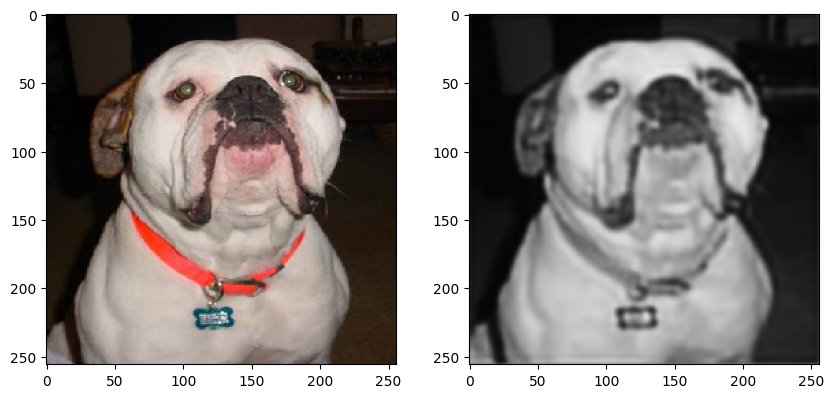

In [54]:
img = input_x_images[20]
predictions = model.predict(np.expand_dims(img, 0))
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(predictions[0])